In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def eucl_dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [35]:
class KMeans:
    def __init__(self, K=5, max_iters=10):
        self.K = K
        self.max_iters = max_iters
        self.clusters = [[] for i in range(self.K)]
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        random_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_idxs]

        for _ in range(self.max_iters):
            self.clusters = self._create_clusters(self.centroids)

            oldCentroids = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            if self._is_converged(oldCentroids, self.centroids):
                break
        
        return self._get_cluster_labels(self.clusters)

    def _create_clusters(self, centroids):
        clusters = [[] for i in range(self.K)]
        for idx, sample in enumerate(self.X):
            cluster_idx = self._closest_centroid(sample, centroids)
            clusters[cluster_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        distances = [eucl_dist(sample, centroid) for centroid in centroids]
        return np.argmin(distances)

    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            centroids[cluster_idx] = np.mean(self.X[cluster], axis=0)
        return centroids

    def _is_converged(self, old, new):
        distances = [eucl_dist(old[i], new[i]) for i in range(self.K)]
        return np.sum(distances) == 0

    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def plot(self):
        fig, ax = plt.subplots(figsize=(12,8))

        for cluster in self.clusters:
            point = self.X[cluster].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker='x', linewidth=2)

        plt.show()
        

(150, 4) (150,)
3
0.8933333333333333


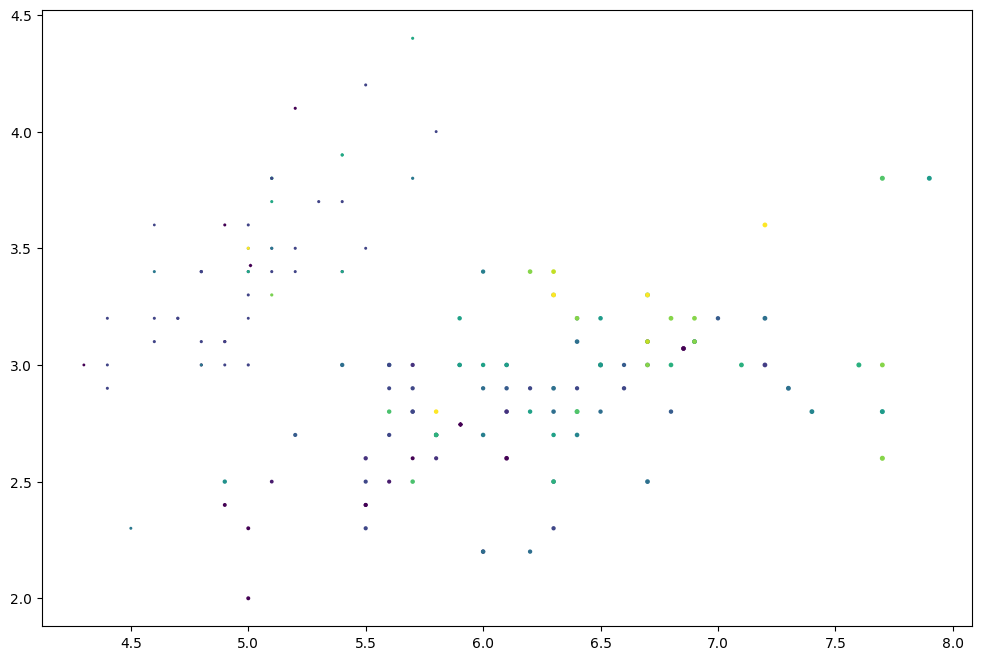

In [49]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

print(X.shape, y.shape)

clusters = len(np.unique(y))
print(clusters)

k = KMeans(K=clusters, max_iters=10000)
y_pred = k.predict(X)

from sklearn.metrics import accuracy_score

print(accuracy_score(y, y_pred))
k.plot()
